1. Установите библиотеку pyedflib (https://pypi.org/project/pyEDFlib/).
2. Подключите другие необходимые библиотеки: numpy, pandas, matplotlib, scipy.
3. С сайта открытых данных биометрии https://physionet.org/ скачайте набор данных "EEG During Mental Arithmetic Tasks" одним zip файлом (команда !wget).
4. С помощью команды !unzip распакуйте данные в соответствие с вашим вариантом (вариант равен номеру в списке группы в ИСУ): номер набора= ваш вариант "_1" суффикс - запись фона без решения задачи "_2" суффикс - запись в момент решения задачи.
5. Считайте данные из 2 файлов, например:path1='/content/eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_1.edf'
path2='/content/eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_2.edf'
используя EdfReader.
6. Считайте число каналов для каждого набора данных (signals_in_file) и метки датчиков в наборах (getSignalLabels()).

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyedflib

path1 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_1.edf'
path2 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_2.edf'

# Open file with pyedflib.EdfReader
data_1 = pyedflib.EdfReader(path1)
data_2 = pyedflib.EdfReader(path2)

#Reading the number of channels and sensor labels for the first file
signals_in_file_1 = data_1.signals_in_file
signal_labels_1 = data_1.getSignalLabels()

# Reading the number of channels and sensor labels for the second file
signals_in_file_2 = data_2.signals_in_file
signal_labels_2 = data_2.getSignalLabels()

# display information about the number of channels and sensor labels
print(f"Number of channels in first file: {signals_in_file_1}")
print(f"Signal labels in first file: {signal_labels_1}")

print(f"Number of channels in second file: {signals_in_file_2}")
print(f"Signal labels in second file: {signal_labels_2}")
data_1.close()
del data_1
data_2.close()
del data_2


Number of channels in first file: 21
Signal labels in first file: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']
Number of channels in second file: 21
Signal labels in second file: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4', 'EEG F7', 'EEG F8', 'EEG T3', 'EEG T4', 'EEG C3', 'EEG C4', 'EEG T5', 'EEG T6', 'EEG P3', 'EEG P4', 'EEG O1', 'EEG O2', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG A2-A1', 'ECG ECG']


7. Используя метод, highlevel.read_edf(path) для каждого набора данных получите информацию о метках датчиков, минимальных и максимальных значениях, зафиксированных во время эксперимента, частоте дискретизации данных, а также поле и имени пациента.

In [63]:
from pyedflib.highlevel import read_edf

# Paths to the EDF files
path1 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_1.edf'
path2 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_2.edf'

# Read the EDF files
signals_1, signal_headers_1, header_1 = read_edf(path1)
signals_2, signal_headers_2, header_2 = read_edf(path2)

# Inspect the headers to find available keys
print(f"Keys in the header for the first file: {header_1.keys()}")
print(f"Keys in the header for the second file: {header_2.keys()}")

# Extracting data from available keys
# Extract information from the first file
print(f"Header for the first file: {header_1}")
print(f"Sampling frequency for the first file: {signal_headers_1[0]['sample_rate']}")
print(f"Min value for the first file: {signal_headers_1[0]['physical_min']}")
print(f"Max value for the first file: {signal_headers_1[0]['physical_max']}")
print(f"Signal labels for the first file: {[signal['label'] for signal in signal_headers_1]}")
# Print all available header information for debugging purposes
print(header_1)

# Extract information from the second file
print(f"Header for the second file: {header_2}")
print(f"Sampling frequency for the second file: {signal_headers_2[0]['sample_rate']}")
print(f"Min value for the second file: {signal_headers_2[0]['physical_min']}")
print(f"Max value for the second file: {signal_headers_2[0]['physical_max']}")
print(f"Signal labels for the second file: {[signal['label'] for signal in signal_headers_2]}")
# Print all available header information for debugging purposes
print(header_2)


Keys in the header for the first file: dict_keys(['technician', 'recording_additional', 'patientname', 'patient_additional', 'patientcode', 'equipment', 'admincode', 'sex', 'startdate', 'birthdate', 'gender', 'annotations'])
Keys in the header for the second file: dict_keys(['technician', 'recording_additional', 'patientname', 'patient_additional', 'patientcode', 'equipment', 'admincode', 'sex', 'startdate', 'birthdate', 'gender', 'annotations'])
Header for the first file: {'technician': 'Doctor', 'recording_additional': '', 'patientname': 'Subject6', 'patient_additional': '', 'patientcode': '32', 'equipment': 'NeuroCom Professional 3.0.0', 'admincode': '32', 'sex': 'Female', 'startdate': datetime.datetime(2011, 1, 1, 0, 0), 'birthdate': '01 jan 1993', 'gender': 'Female', 'annotations': []}
Sampling frequency for the first file: 500.0
Min value for the first file: -29.6936
Max value for the first file: 29.31869
Signal labels for the first file: ['EEG Fp1', 'EEG Fp2', 'EEG F3', 'EEG F4'

8. Преобразуйте данный набор в DataFrame pandas, оставив только данные, относящиеся к ЭЭГ.

In [69]:
# Paths to the EDF files
path1 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_1.edf'
path2 = 'eeg-during-mental-arithmetic-tasks-1.0.0/Subject06_2.edf'

# Read the EDF files using highlevel.read_edf
signals_1, signal_headers_1, header_1 = read_edf(path1)
signals_2, signal_headers_2, header_2 = read_edf(path2)

# Convert the signals to DataFrame
df1 = pd.DataFrame(signals_1).transpose()
df2 = pd.DataFrame(signals_2).transpose()

# Add column names (labels) to the DataFrame
df1.columns = [signal['label'] for signal in signal_headers_1]
df2.columns = [signal['label'] for signal in signal_headers_2]

# Filter the DataFrame to keep only EEG data
# Assuming EEG data labels contain "EEG"
df1_eeg = df1.filter(like='EEG')
df2_eeg = df2.filter(like='EEG')

# Display the first few rows of the DataFrame to verify
print(df1_eeg.head())
print(df2_eeg.head())


    EEG Fp1   EEG Fp2     EEG F3    EEG F4    EEG F7    EEG F8    EEG T3  \
0  3.811081 -2.032803  10.831775  0.183276  7.460045 -2.015946 -1.786223   
1  3.687717 -0.308909  11.230332  0.149250  7.269646 -1.950777 -2.126986   
2  3.489614  2.178984  11.480359  0.231885  6.944328 -1.761659 -2.667463   
3  3.329330  5.129194  11.606610  0.562423  6.646750 -1.352754 -3.231657   
4  3.346439  8.045448  11.729148  1.259470  6.578661 -0.619281 -3.588646   

     EEG T4    EEG C3    EEG C4    EEG T5    EEG T6    EEG P3    EEG P4  \
0  2.160716 -2.950043 -2.621937  6.927780 -0.023770 -7.524791 -5.216351   
1  2.859127 -2.757175 -2.131358  5.679833  0.881876 -6.861789 -4.546266   
2  3.661272 -2.583309 -1.655817  4.170583  1.677600 -6.220043 -3.838445   
3  4.542501 -2.322034 -1.161479  2.736796  2.299198 -5.659274 -3.089459   
4  5.486383 -1.838438 -0.554364  1.732131  2.774881 -5.212886 -2.256998   

      EEG O1    EEG O2    EEG Fz    EEG Cz    EEG Pz  EEG A2-A1  
0  -9.263765 -8.053630 -0.

9. Подготовьте массивы данных для частотного анализа на основе Фурье преобразования, например, используя:

signal1 = np.zeros((n1, data_1.getNSamples()[0]))

signal2 = np.zeros((n2, data_2.getNSamples()[0]))

где n1 и n2 число датчиков.

Далее используя метод readSignal(), считайте данные сигналов по датчикам (если данные перестали себя хорошо вести, используйте data_1.close() и потом снова их прочитайте).

Для удобства отображения преобразуйте в DataFrame pandas.

10. Проверьте число строк и столбцов у DataFrame’ов.


In [71]:
import numpy as np
import pandas as pd
from pyedflib import EdfReader

# Подготовьте массивы для хранения данных сигналов
n1 = df1_eeg.shape[1]  # число датчиков в первом наборе данных
n2 = df2_eeg.shape[1]  # число датчиков во втором наборе данных

# Создайте пустые массивы для данных сигналов
signal1 = np.zeros((n1, df1_eeg.shape[0]))
signal2 = np.zeros((n2, df2_eeg.shape[0]))

# Заполните массивы данными из DataFrame
for i, col in enumerate(df1_eeg.columns):
    signal1[i, :] = df1_eeg[col].values
    
for i, col in enumerate(df2_eeg.columns):
    signal2[i, :] = df2_eeg[col].values

# Убедитесь, что данные правильно загружены
print(f"Signal1 shape: {signal1.shape}")
print(f"Signal2 shape: {signal2.shape}")


Signal1 shape: (20, 91000)
Signal2 shape: (20, 31000)


11.  Задайте диапазон, например,  от 100 до 400 для построения графика и постройте stem графики по данным ЭЭГ и ЭКГ в данном диапазоне.

12. Примените Фурье-преобразование после чего получите частотную составляющую в относительных единицах, например f_data1[i] = rfft(signal1[i]).

C:\Users\quyen\AppData\Local\Temp\ipykernel_11564\1471773455.py:22: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(start_idx, end_idx), signal1_data, use_line_collection=True)
C:\Users\quyen\AppData\Local\Temp\ipykernel_11564\1471773455.py:30: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(np.arange(start_idx, end_idx), signal2_data, use_line_collection=True)


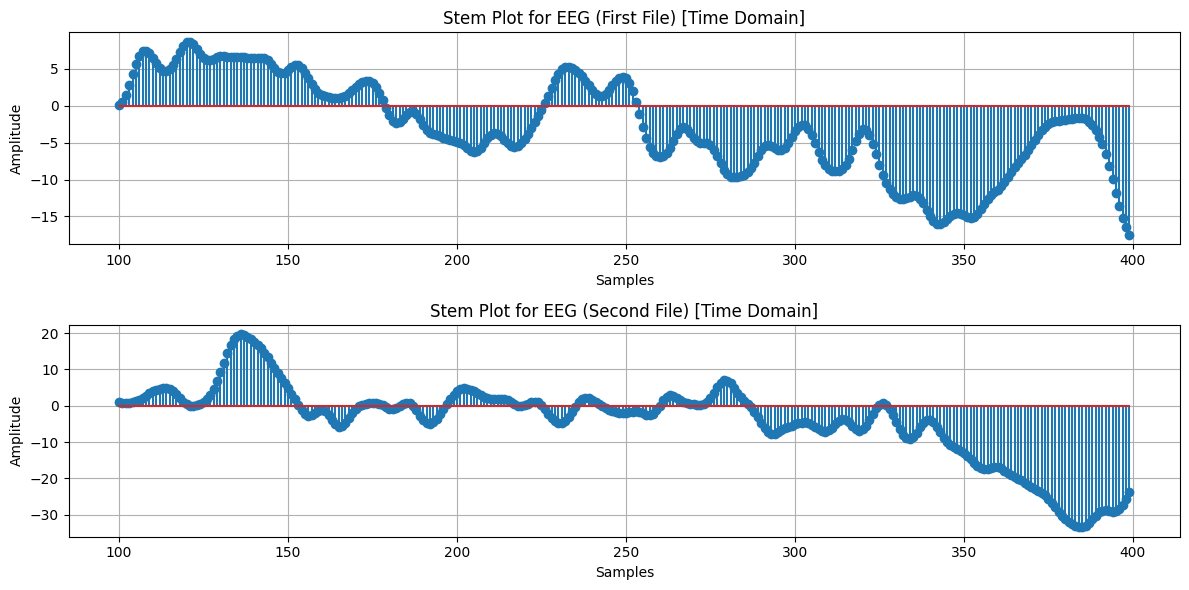

C:\Users\quyen\AppData\Local\Temp\ipykernel_11564\1471773455.py:53: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq1, np.abs(f_data1), use_line_collection=True)
C:\Users\quyen\AppData\Local\Temp\ipykernel_11564\1471773455.py:62: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq2, np.abs(f_data2), use_line_collection=True)


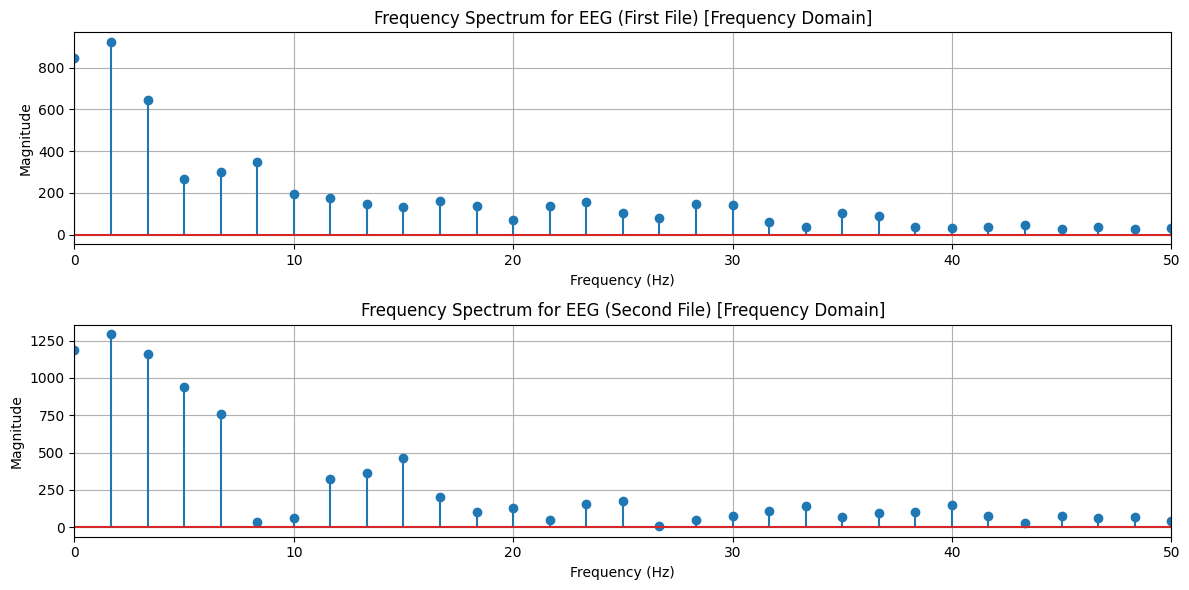

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parameters
sampling_rate = 500  # Sampling rate in Hz, replace with your actual sampling rate

# Range for plotting (in terms of samples)
start_idx = 100
end_idx = 400

# Example data for analysis (signals from channel 0 of DataFrame df_1 and df_2)
signal1_data = df_1.iloc[start_idx:end_idx, 0].values  # Channel 0 from the first file
signal2_data = df_2.iloc[start_idx:end_idx, 0].values  # Channel 0 from the second file

# Plot stem plots for EEG signals (in time domain)
plt.figure(figsize=(12, 6))

# Plot for the first file (EEG signal)
plt.subplot(2, 1, 1)
plt.stem(np.arange(start_idx, end_idx), signal1_data, use_line_collection=True)
plt.title("Stem Plot for EEG (First File) [Time Domain]")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

# Plot for the second file (EEG signal)
plt.subplot(2, 1, 2)
plt.stem(np.arange(start_idx, end_idx), signal2_data, use_line_collection=True)
plt.title("Stem Plot for EEG (Second File) [Time Domain]")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()

# Apply Fourier Transform to obtain the frequency components
# Using rfft to get the spectrum
f_data1 = rfft(signal1_data)
f_data2 = rfft(signal2_data)

# Frequency axis for the data based on the sampling rate
freq1 = rfftfreq(len(signal1_data), 1./sampling_rate)
freq2 = rfftfreq(len(signal2_data), 1./sampling_rate)

# Plot the frequency spectrum for the first file (EEG signal)
plt.figure(figsize=(12, 6))

# Spectrum plot for the first file (EEG signal)
plt.subplot(2, 1, 1)
plt.stem(freq1, np.abs(f_data1), use_line_collection=True)
plt.title("Frequency Spectrum for EEG (First File) [Frequency Domain]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)  # Limit the frequency axis to 50 Hz
plt.grid()

# Spectrum plot for the second file (EEG signal)
plt.subplot(2, 1, 2)
plt.stem(freq2, np.abs(f_data2), use_line_collection=True)
plt.title("Frequency Spectrum for EEG (Second File) [Frequency Domain]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim(0, 50)  # Limit the frequency axis to 50 Hz
plt.grid()

plt.tight_layout()
plt.show()


13. С учетом полученной ранее частоты 500 Гц, преобразуйте данные, например freq1[i] = rfftfreq(len(signal1[i]), 1./500).

14. Получите спектральную мощность spectr1[i] = np_abs(f_data1[i]).

15. Постройте графики спектральной мощности по всем датчикам в диапазоне (0, 50).

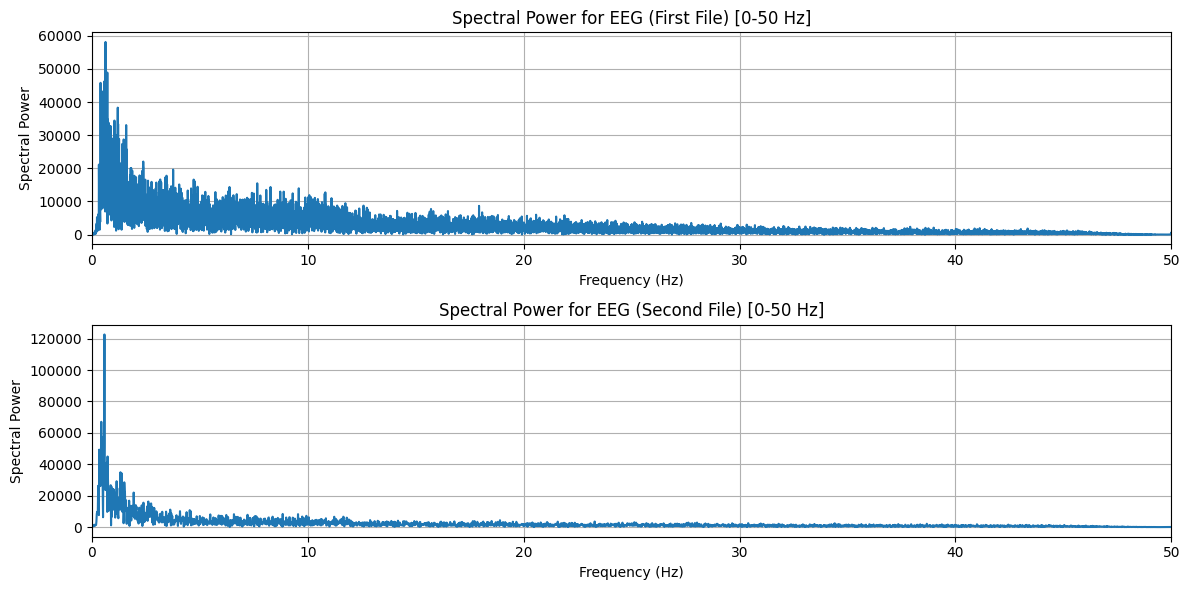

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parameters
sampling_rate = 500  # Sampling rate in Hz

# Example data for analysis (signals from channel 0 of DataFrame df_1 and df_2)
signal1_data = df_1.iloc[:, 0].values  # Channel 0 for the first file
signal2_data = df_2.iloc[:, 0].values  # Channel 0 for the second file

# Applying Fourier transform to each signal
f_data1 = rfft(signal1_data)
f_data2 = rfft(signal2_data)

# Frequency axis for the data with the sampling rate
freq1 = rfftfreq(len(signal1_data), 1./sampling_rate)  # Frequency axis for the first signal
freq2 = rfftfreq(len(signal2_data), 1./sampling_rate)  # Frequency axis for the second signal

# Calculate spectral power as the amplitude of the spectrum
spectr1 = np.abs(f_data1)
spectr2 = np.abs(f_data2)

# Plotting the spectral power graph for the first file (EEG signal)
plt.figure(figsize=(12, 6))

# Plot for the first file (EEG signal)
plt.subplot(2, 1, 1)
plt.plot(freq1, spectr1)
plt.title("Spectral Power for EEG (First File) [0-50 Hz]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Power")
plt.xlim(0, 50)  # Limiting the frequency axis to 50 Hz
plt.grid()

# Plot for the second file (EEG signal)
plt.subplot(2, 1, 2)
plt.plot(freq2, spectr2)
plt.title("Spectral Power for EEG (Second File) [0-50 Hz]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Power")
plt.xlim(0, 50)  # Limiting the frequency axis to 50 Hz
plt.grid()

plt.tight_layout()
plt.show()


16. Произведите простейшую фильтрацию по частотам, оставив только Альфа и Бета диапазон (от 7 до 40 Гц).

17. Постройте графики спектральной мощности по всем датчикам в диапазоне (0, 50).

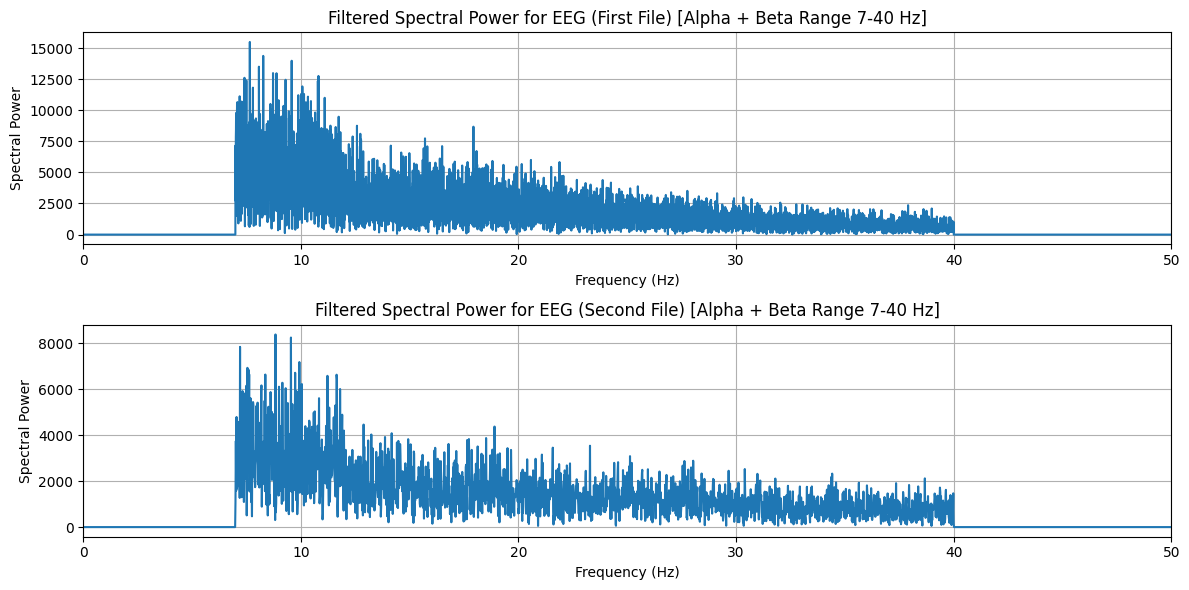

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfftfreq

# Parameters
sampling_rate = 500  # Sampling rate in Hz

# Example data for analysis (signals for channel 0 from DataFrame df_1 and df_2)
signal1_data = df_1.iloc[:, 0].values  # Channel 0 for the first file
signal2_data = df_2.iloc[:, 0].values  # Channel 0 for the second file

# Apply Fourier transform to each signal
f_data1 = rfft(signal1_data)
f_data2 = rfft(signal2_data)

# Frequency axis for data with the given sampling rate
freq1 = rfftfreq(len(signal1_data), 1./sampling_rate)  # Frequency axis for the first signal
freq2 = rfftfreq(len(signal2_data), 1./sampling_rate)  # Frequency axis for the second signal

# Calculate spectral power as the magnitude of the spectrum
spectr1 = np.abs(f_data1)
spectr2 = np.abs(f_data2)

# Frequency filtering (Alpha and Beta bands: 7-40 Hz)
# Ensure that frequencies for both signals match

# Masks for filtering in the 7-40 Hz range
alpha_beta_range_1 = (freq1 >= 7) & (freq1 <= 40)  # Mask for the first signal
alpha_beta_range_2 = (freq2 >= 7) & (freq2 <= 40)  # Mask for the second signal

# Apply filtering to the spectra
spectr1_filtered = spectr1 * alpha_beta_range_1  # Filtering for the first signal
spectr2_filtered = spectr2 * alpha_beta_range_2  # Filtering for the second signal

# Plot spectral power for the first file (EEG signal) after filtering
plt.figure(figsize=(12, 6))

# Spectrum plot for the first file (EEG signal) after filtering
plt.subplot(2, 1, 1)
plt.plot(freq1, spectr1_filtered)
plt.title("Filtered Spectral Power for EEG (First File) [Alpha + Beta Range 7-40 Hz]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Power")
plt.xlim(0, 50)  # Limit the frequency axis to 50 Hz
plt.grid()

# Spectrum plot for the second file (EEG signal) after filtering
plt.subplot(2, 1, 2)
plt.plot(freq2, spectr2_filtered)
plt.title("Filtered Spectral Power for EEG (Second File) [Alpha + Beta Range 7-40 Hz]")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral Power")
plt.xlim(0, 50)  # Limit the frequency axis to 50 Hz
plt.grid()

plt.tight_layout()
plt.show()


18. Выполните обратное Фурье-преобразование для данных без лишних частот: ff_data1[i] = irfft(cut_f_data1[i]).

19. Постройте графики сигналов для каждого из датчиков на диапазоне от 0 до 5000.

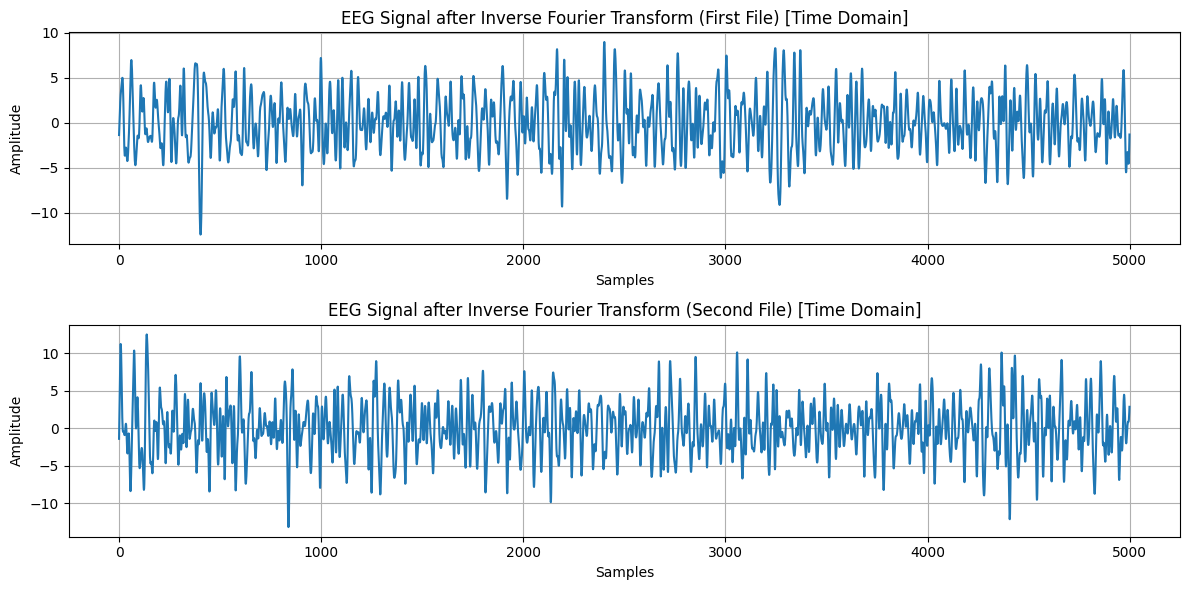

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import irfft

# Parameters
sampling_rate = 500  # Sampling rate in Hz

# Example data for analysis (signals for channel 0 from DataFrame df_1 and df_2)
signal1_data = df_1.iloc[:, 0].values  # Channel 0 for the first file
signal2_data = df_2.iloc[:, 0].values  # Channel 0 for the second file

# Apply Fourier transform to each signal
f_data1 = rfft(signal1_data)
f_data2 = rfft(signal2_data)

# Frequency axis for data with the given sampling rate
freq1 = rfftfreq(len(signal1_data), 1./sampling_rate)  # Frequency axis for the first signal
freq2 = rfftfreq(len(signal2_data), 1./sampling_rate)  # Frequency axis for the second signal

# Calculate spectral power as the magnitude of the spectrum
spectr1 = np.abs(f_data1)
spectr2 = np.abs(f_data2)

# Frequency filtering (Alpha and Beta bands: 7-40 Hz)
alpha_beta_range_1 = (freq1 >= 7) & (freq1 <= 40)  # Mask for the first signal
alpha_beta_range_2 = (freq2 >= 7) & (freq2 <= 40)  # Mask for the second signal

# Apply filtering to the spectra
f_data1_filtered = f_data1 * alpha_beta_range_1  # Filtering for the first signal
f_data2_filtered = f_data2 * alpha_beta_range_2  # Filtering for the second signal

# Apply inverse Fourier transform
ff_data1 = irfft(f_data1_filtered)  # Inverse transform for the first signal
ff_data2 = irfft(f_data2_filtered)  # Inverse transform for the second signal

# Plot the signals for the first and second files
plt.figure(figsize=(12, 6))

# Plot for the first file (time-domain signal after inverse Fourier transform)
plt.subplot(2, 1, 1)
plt.plot(np.arange(5000), ff_data1[:5000])  # Limit the range to 5000 samples
plt.title("EEG Signal after Inverse Fourier Transform (First File) [Time Domain]")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

# Plot for the second file (time-domain signal after inverse Fourier transform)
plt.subplot(2, 1, 2)
plt.plot(np.arange(5000), ff_data2[:5000])  # Limit the range to 5000 samples
plt.title("EEG Signal after Inverse Fourier Transform (Second File) [Time Domain]")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


**Состояние покоя:**

Альфа-волны (8–13 Гц) доминируют во время отдыха, отражая расслабленное состояние.

Низкая активность бета-волн (13–30 Гц).

Сигнал ровный с более медленными колебаниями.

**Состояние решения задач**

Бета-волны становятся более выраженными, когда мозг участвует в активной когнитивной работе.

Альфа-волны уменьшаются во время сосредоточенной деятельности.

Сигнал показывает более быстрые колебания, что указывает на повышенные умственные усилия.

**Сравнение спектральной мощности**

Состояние покоя: более высокая спектральная мощность в альфа-диапазоне.

Решение задач: повышенная спектральная мощность в бета-диапазоне, что указывает на активную концентрацию и решение проблем.

**Изменения амплитуды**

Состояние покоя показывает более высокую амплитуду в альфа-диапазоне.

Решение задач показывает повышенную амплитуду в бета-диапазоне.

**Вывод:**
Сигналы ЭЭГ показывают четкое различие между состоянием покоя и активным когнитивным состоянием. Состояние покоя характеризуется доминирующими альфа-волнами, в то время как решение задач усиливает активность бета-волн, что указывает на повышенные умственные усилия и сосредоточенность. Этот паттерн можно использовать для оценки когнитивной нагрузки и психического состояния.